## Logistic Regression (Regressión Logística)

La regresión logística es una técnica estadística y de machine learning que se utiliza para clasificar datos, mientras que las regresiones lineale buscan predecir una variable continua **la regresión logística se enfoca en predecir la clase de una variable categorica.**

Por lo tanto forma parte de los modelos de clasificación. Es sencillo de implementar, tiene buen rendimiento cuando las clases son linealmente separables, trabaja mejor con clases binarias y es un modelo probabilístico. 

**La regresión lógistica mide la probabilidad de que un patrón pertenezca a una clase u otra.**

### Función Logistica (Sigmoid)

La función logistica, también conocida como **función sigmoidal** (o Sigmoid en inglés) es la función que le da nombre a este clasificador.

Ésta función se define de la siguiente forma:

$$sigmoid(x) = \frac{1}{1 + e^{-x}}$$

Otra forma de definar la función:

$$sigmoid(x) = \frac{e^{x}}{e^{x} + 1}$$

Gráfica de la función sigmoidal:
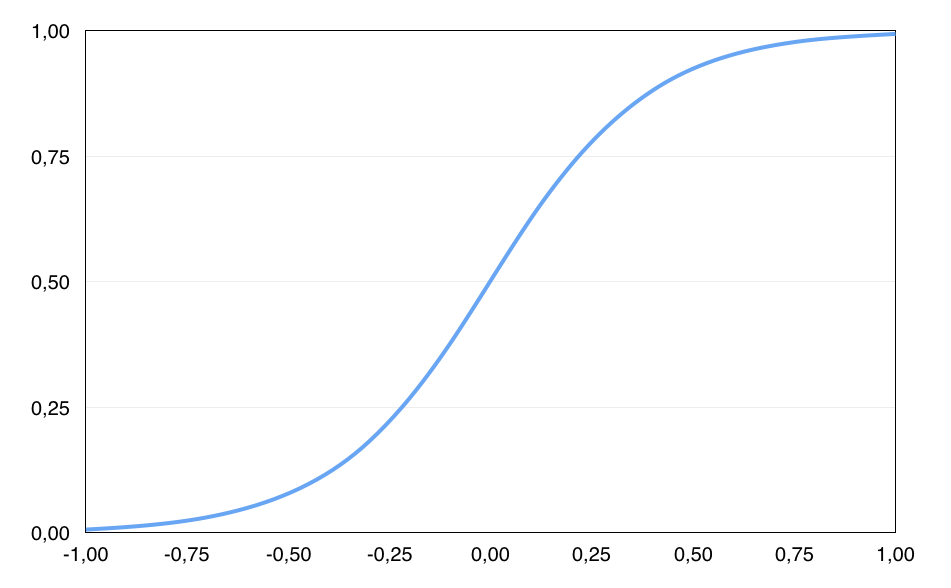


**La función sigmoidal mostrada arriba es la que se usaría si tuviesemos un modelo de una sola característica (atributo).**

Para **modelos multilineales** el valor de **$x$ será sustituido por una función que se ajuste mejor a los datos de entrenamiento**, dando de esta forma una **variante de la función sigmoidal**, en otras palabras, estaríamos hablando de una función sigmoidal donde **$x$ pasa a ser una función de n-variables (una por cada atributo o columna)**, similar a lo que sucede con las **Regresiones Lineales**.

Para estos casos, la función sigmoidal sería: 

$$sigmoid(x) = \frac{1}{1 + e^{-(w_{0}*x_{0} + w_{1}*x_{1}+...+w_{n})}}$$



**$x$ pasa a ser una ecuación lineal resultado de una regresion lineal que se ajusta lo mejor posible a los datos.**

- El **dominio de esta función son todos los números reales** y el rango o **codominio son los valores entre 0 y 1**, sin incluirlos, es decir, **nunca llegan a ser 0 o 1**.


- La idea detrás de este clasificador es **"transformar"** cada instancia del conjunto de entrenamiento **usando la función sigmoidal**, dando como **resultado un número entre 0 y 1**. Dependiendo del resultado, el clasificador asignará una clase a cada instancia. **Si el resultado es < 0.5 el clasificador lo asignará a la clase 0, si el resultado es > 0.5 el clasificador lo asignará a la clase 1**.


- **La regresión logística es un algoritmo lineal** (con una transformación no lineal en la salida). **Asume una relación lineal entre las variables de entrada con la salida.** Las transformaciones de datos de sus variables de entrada que exponen mejor esta relación lineal pueden dar como **resultado un modelo más preciso**. Por ejemplo, puede usar **log, sqrt, Box-Cox y otras transformaciones** univariadas para exponer mejor esta relación.


- **El modelo puede sobreajustarse (overfitting)** si tiene varias características (atributos) altamente correlacionados. Podemos considerar eliminar las carácterísticas (atributos) altamente correlacionadas.


- **Es posible que el proceso de estimación de probabilidad esperada que aprende los coeficientes no converja**. Esto puede suceder si hay muchas características altamente correlacionadas o tenemos una matriz **"sparse"** (una matriz con muchos ceros).


_**Documentacion:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html_

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

# En esta ocasión vamos a quedarnos con las primeras 2 clases

In [56]:
X.shape, y.shape

((100, 2), (100,))

### Preprocesamiento

In [57]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.2962963 , 0.625     ],
       [0.22222222, 0.41666667],
       [0.14814815, 0.5       ],
       [0.11111111, 0.45833333],
       [0.25925926, 0.66666667],
       [0.40740741, 0.79166667],
       [0.11111111, 0.58333333],
       [0.25925926, 0.58333333],
       [0.03703704, 0.375     ],
       [0.22222222, 0.45833333],
       [0.40740741, 0.70833333],
       [0.18518519, 0.58333333],
       [0.18518519, 0.41666667],
       [0.        , 0.41666667],
       [0.55555556, 0.83333333],
       [0.51851852, 1.        ],
       [0.40740741, 0.79166667],
       [0.2962963 , 0.625     ],
       [0.51851852, 0.75      ],
       [0.2962963 , 0.75      ],
       [0.40740741, 0.58333333],
       [0.2962963 , 0.70833333],
       [0.11111111, 0.66666667],
       [0.2962963 , 0.54166667],
       [0.18518519, 0.58333333],
       [0.25925926, 0.41666667],
       [0.25925926, 0.58333333],
       [0.33333333, 0.625     ],
       [0.33333333, 0.58333333],
       [0.14814815, 0.5       ],
       [0.

### Train, Test

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (70, 2), y_train: (70,)
X_test: (30, 2),  y_test: (30,)


### Modelo

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Predicciones

In [60]:
yhat = model.predict(X_test)

yhat

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

In [61]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0


### Confusion Matrix

In [62]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[17,  0],
       [ 0, 13]], dtype=int64)

### Classification Report

In [63]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        17
           1      1.000     1.000     1.000        13

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



### Métodos y Atributos del Modelo

In [64]:
# .predict_proba()

model.predict_proba(X_test)

array([[0.24371714, 0.75628286],
       [0.27259765, 0.72740235],
       [0.38006402, 0.61993598],
       [0.63677249, 0.36322751],
       [0.74319439, 0.25680561],
       [0.65473469, 0.34526531],
       [0.80610904, 0.19389096],
       [0.29404834, 0.70595166],
       [0.64857255, 0.35142745],
       [0.67821861, 0.32178139],
       [0.5924888 , 0.4075112 ],
       [0.66084528, 0.33915472],
       [0.24205315, 0.75794685],
       [0.73622572, 0.26377428],
       [0.3397425 , 0.6602575 ],
       [0.72432283, 0.27567717],
       [0.12514778, 0.87485222],
       [0.16541599, 0.83458401],
       [0.63677249, 0.36322751],
       [0.57339826, 0.42660174],
       [0.33569474, 0.66430526],
       [0.41181924, 0.58818076],
       [0.68019021, 0.31980979],
       [0.77410899, 0.22589101],
       [0.29217347, 0.70782653],
       [0.73269622, 0.26730378],
       [0.70272884, 0.29727116],
       [0.3596556 , 0.6403444 ],
       [0.63467698, 0.36532302],
       [0.15604495, 0.84395505]])

### Recta que separa las nubes de puntos

In [65]:
# Ecuación de la recta definida por el modelo

print("RECTA")

print(f"\tCoeficientes: {model.coef_[0]}")

print(f"\tIntercepción: {model.intercept_[0]}")

ecuacion = " ".join(([f"+{coef}*w{num}" if coef >= 0 else f"{coef}*w{num}"\
                      for num, coef in enumerate(np.round(model.coef_[0], 3))]\
                     + [str(np.round(model.intercept_[0], 3))]))

print(f"\tEcuación: {ecuacion}")

print("*"*100)

print("FUNCION SIGMOID")

print(f"\t1 / (1 + e**-({ecuacion}))")

RECTA
	Coeficientes: [ 3.09768585 -2.53632744]
	Intercepción: -0.0782254595264431
	Ecuación: +3.098*w0 -2.536*w1 -0.078
****************************************************************************************************
FUNCION SIGMOID
	1 / (1 + e**-(+3.098*w0 -2.536*w1 -0.078))


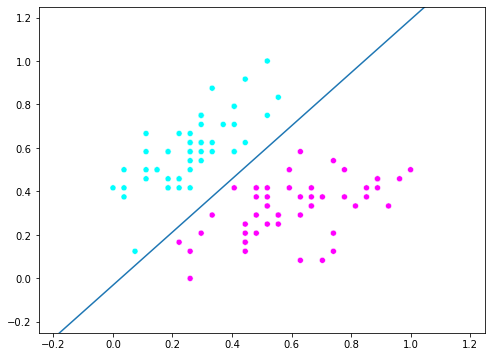

In [66]:
# Gráfico

plt.figure(figsize = (8, 6))

# Puntos de las primera 2 clases
sns.scatterplot(x = X[:, 0], y = X[:, 1], c = y, cmap = "cool")

# Recta
x_linspace = np.linspace(-0.25, 1.25, 100)
recta = (model.coef_[0][0]*x_linspace + model.intercept_[0])/(-model.coef_[0][1])

plt.plot(x_linspace, recta)

plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)

plt.show()

### Representación de yhat y la función Sigmoid

In [67]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_regression(coef_, intercept_, x):
    recta = np.dot(coef_, x) + intercept_
    
    return sigmoid(recta)

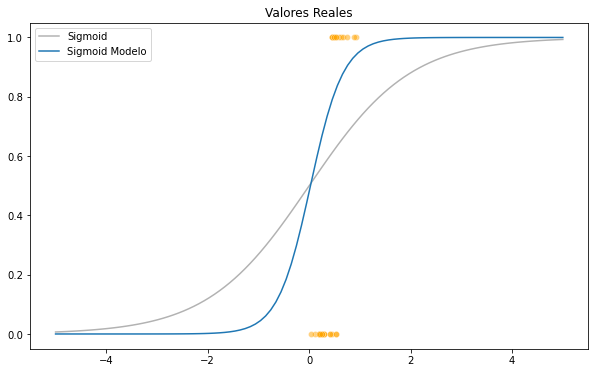

In [68]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:, 0], y = y_test, color = "orange", alpha = 0.5)

plt.title("Valores Reales")
plt.legend()
plt.show()

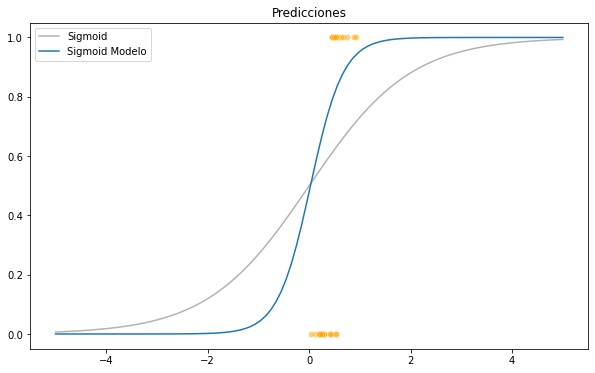

In [69]:
plt.figure(figsize = (10, 6))

x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:, 0], y = yhat, color = "orange", alpha = 0.5)

plt.title("Predicciones")
plt.legend()
plt.show()

In [70]:
################################################################################################################################

### Ejercicio 1:
- Utiliza el dataset del titanic para practicar **`LogisticRegression`**:

# Modelo y métricas

In [71]:
df = pd.read_csv("titanic_preprocesamiento.csv")
df.head(3)

,Age,Pclass,Fare,Fare-Binning,Age-Binning,female,male,Familia,Soltero,Miss.,Mr.,Mrs.,Other,Survived
0,22.0,3.0,7.2500,2.0,1.0,0,1,1,0,0,1,0,0,0.0
1,38.0,1.0,71.2833,2.0,0.0,1,0,0,1,0,0,1,0,1.0
2,26.0,3.0,7.9250,2.0,1.0,1,0,0,1,1,0,0,0,1.0


In [72]:
X = np.array(df1.drop(["Survived", "Fare-Binning", "Age-Binning"], axis = 1))

y = np.array(df1["Survived"])

X.shape, y.shape

((888, 11), (888,))

In [73]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.27117366, 1.        , 0.02756654, ..., 1.        , 0.        ,
        0.        ],
       [0.4722292 , 0.        , 0.27103916, ..., 0.        , 1.        ,
        0.        ],
       [0.32143755, 1.        , 0.03013308, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.34656949, 1.        , 0.0891635 , ..., 0.        , 0.        ,
        0.        ],
       [0.32143755, 0.        , 0.11406844, ..., 1.        , 0.        ,
        0.        ],
       [0.39683338, 1.        , 0.02946768, ..., 1.        , 0.        ,
        0.        ]])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (621, 11), y_train: (621,)
X_test: (267, 11),  y_test: (267,)


In [75]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [76]:
yhat = model.predict(X_test)

yhat

array([0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0.

In [78]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
print("ROC AUC:", roc_auc_score(y_test, yhat))

Jaccard Index: 0.6816842105263158
Accuracy: 0.8202247191011236
Precisión: 0.8180538555691554
Sensibilidad: 0.8035630841121495
F1-score: 0.808898962185375
ROC AUC: 0.8035630841121495


In [79]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[142,  18],
       [ 30,  77]], dtype=int64)

In [80]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

         0.0      0.826     0.887     0.855       160
         1.0      0.811     0.720     0.762       107

    accuracy                          0.820       267
   macro avg      0.818     0.804     0.809       267
weighted avg      0.820     0.820     0.818       267



In [81]:
model.predict_proba(X_test)

array([[0.93175196, 0.06824804],
       [0.10384108, 0.89615892],
       [0.4804836 , 0.5195164 ],
       [0.78413346, 0.21586654],
       [0.11476093, 0.88523907],
       [0.70067834, 0.29932166],
       [0.76762123, 0.23237877],
       [0.88970826, 0.11029174],
       [0.07794196, 0.92205804],
       [0.09914637, 0.90085363],
       [0.63281393, 0.36718607],
       [0.42784697, 0.57215303],
       [0.93607213, 0.06392787],
       [0.74356337, 0.25643663],
       [0.84656109, 0.15343891],
       [0.9309089 , 0.0690911 ],
       [0.64479177, 0.35520823],
       [0.90546566, 0.09453434],
       [0.76583521, 0.23416479],
       [0.53633839, 0.46366161],
       [0.79086739, 0.20913261],
       [0.76360933, 0.23639067],
       [0.90703993, 0.09296007],
       [0.5989202 , 0.4010798 ],
       [0.91472468, 0.08527532],
       [0.35616808, 0.64383192],
       [0.80282112, 0.19717888],
       [0.29276389, 0.70723611],
       [0.56491235, 0.43508765],
       [0.77138926, 0.22861074],
       [0.

# Recta y representación gráfica

In [82]:
# Ecuación de la recta definida por el modelo

print("RECTA")

print(f"\tCoeficientes: {model.coef_[0]}")

print(f"\tIntercepción: {model.intercept_[0]}")

ecuacion = " ".join(([f"+{coef}*w{num}" if coef >= 0 else f"{coef}*w{num}"\
                      for num, coef in enumerate(np.round(model.coef_[0], 3))]\
                     + [str(np.round(model.intercept_[0], 3))]))

print(f"\tEcuación: {ecuacion}")

print("*"*100)

print("FUNCION SIGMOID")

print(f"\t1 / (1 + e**-({ecuacion}))")

RECTA
	Coeficientes: [-1.51187888 -1.97942575  0.23631936  0.55232613 -0.55310364 -0.18421821
  0.18344069  0.19171015 -1.12586434  0.99024521 -0.05686854]
	Intercepción: 1.745607638781772
	Ecuación: -1.512*w0 -1.979*w1 +0.236*w2 +0.552*w3 -0.553*w4 -0.184*w5 +0.183*w6 +0.192*w7 -1.126*w8 +0.99*w9 -0.057*w10 1.746
****************************************************************************************************
FUNCION SIGMOID
	1 / (1 + e**-(-1.512*w0 -1.979*w1 +0.236*w2 +0.552*w3 -0.553*w4 -0.184*w5 +0.183*w6 +0.192*w7 -1.126*w8 +0.99*w9 -0.057*w10 1.746))


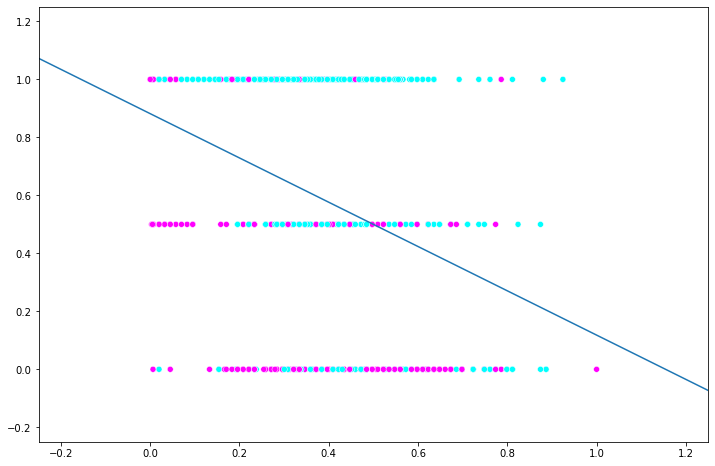

In [90]:
# Gráfico

plt.figure(figsize = (12, 8))

# Puntos
sns.scatterplot(x = X[:, 0], y = X[:, 1], c = y, cmap = "cool")

# Recta
x_linspace = np.linspace(-0.25, 1.25, 100)
recta = (model.coef_[0][0]*x_linspace + model.intercept_[0])/(-model.coef_[0][1])

plt.plot(x_linspace, recta)

plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)

plt.show()

In [84]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_regression(coef_, intercept_, x):
    recta = np.dot(coef_, x) + intercept_
    
    return sigmoid(recta)

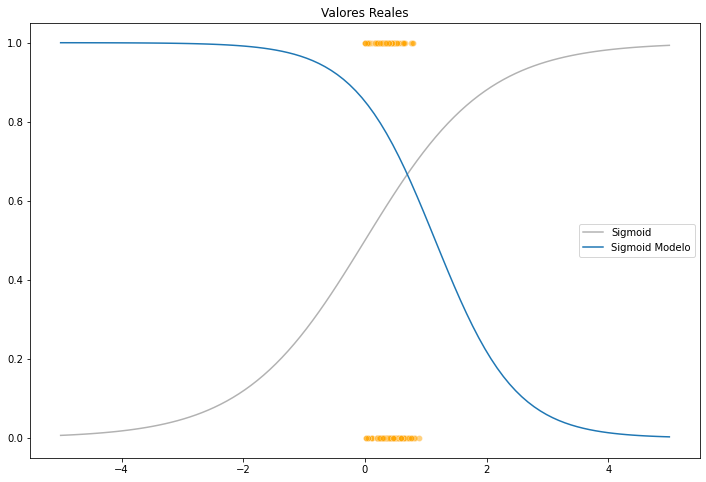

In [85]:
# Valores originales

plt.figure(figsize = (12, 8))

x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:, 0], y = y_test, color = "orange", alpha = 0.5)

plt.title("Valores Reales")
plt.legend()
plt.show()

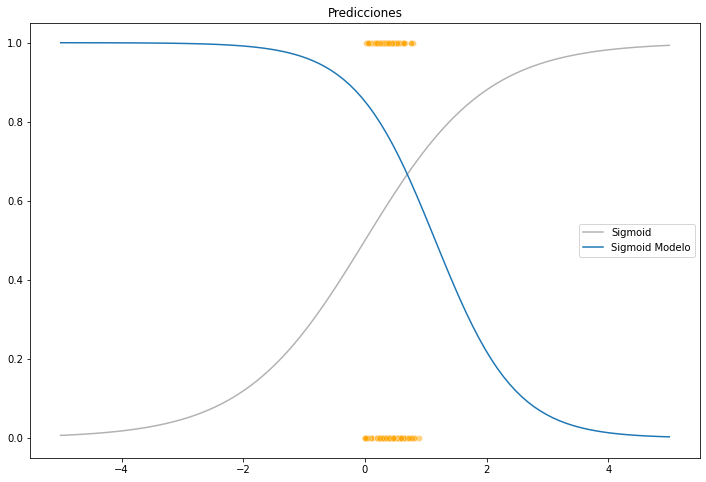

In [86]:
# Valores predichos

plt.figure(figsize = (12, 8))

x_linspace = np.linspace(-5, 5, 100)
curva_sigmoid = sigmoid_regression(model.coef_[0][0], model.intercept_[0], x_linspace)

# Curva Sigmoid Original
plt.plot(x_linspace, sigmoid(x_linspace), color = "black", alpha = 0.3, label = "Sigmoid")

# Curva Sigmoid de la regression
plt.plot(x_linspace, curva_sigmoid, label = "Sigmoid Modelo")

# Puntos de X_test & y_test
sns.scatterplot(x = X_test[:, 0], y = yhat, color = "orange", alpha = 0.5)

plt.title("Predicciones")
plt.legend()
plt.show()